In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_subset = pd.read_csv('../data/bead_reads_subset.csv', index_col='Unnamed: 0').fillna(0)
data_subset_arr = np.nan_to_num(data_subset.to_numpy())

In [3]:
data_norm = np.linalg.norm(data_subset_arr, ord='fro')

In [4]:
Lvals = []
TVvals = []
loss_curves = []

for val in ['0.1','0.01','0.001','0.0001','1e-05']:
    for val2 in ['0.1','0.01','0.001','0.0001','1e-05']:

        try:
            curve = np.load(f'../results/loss_curves/mf_rank100_L{val}_TV{val2}_losses.npy')

            loss_curves.append(curve)
            Lvals.append(val)
            TVvals.append(val2)

        except:
            curve = np.zeros_like(curve)
            loss_curves.append(curve)
            Lvals.append(val)
            TVvals.append(val2)



In [5]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots( rows=5, cols=5,
subplot_titles=([f'Laplacian: {x}, TV: {TVvals[i]}' for i,x in enumerate(Lvals)]))

for ii, xx in enumerate(loss_curves):

    row = ii // 5 + 1
    col = ii % 5 + 1

    fig.add_trace(
        go.Scatter(
            x = np.arange(loss_curves[ii].shape[0]),
            y = loss_curves[ii]**(0.5) / data_norm,
            line=dict(color='firebrick', width=2),
            #mode="markers+text",
            #text=["Text A", "Text B", "Text C"],
            #textposition="bottom center"
        ),
        row=row, col=col
    )


fig.update_layout(height=1500, width=1500, title_text="Convergence curves for varying values of the regularization parameter", showlegend=False)

fig.update_xaxes(title_text="iterations")

fig.update_yaxes(title_text="RRE")

fig.show()

In [6]:
Lvals = []
TVvals = []
final_losses = []

for val in ['0.1','0.01','0.001','0.0001','1e-05']:
    for val2 in ['0.1','0.01','0.001','0.0001','1e-05']:

        try:
            losses = np.load(f'../results/final_losses/mf_rank100_L{val}_TV{val2}_losses.npy')

            final_losses.append(losses)
            Lvals.append(val)
            TVvals.append(val2)

        except:
            losses = np.zeros_like(losses)
            final_losses.append(losses)
            Lvals.append(val)
            TVvals.append(val2)

In [7]:
final_loss_values = pd.DataFrame(np.vstack(final_losses))
final_loss_values.columns = ['RRE','laplacian_loss','tv_loss']
#final_loss_values['RRE'] = final_loss_values['RRE']**(0.5)/data_norm

final_loss_values['RRE'] = [loss_curve[-1]**(0.5)/data_norm for loss_curve in loss_curves]

final_loss_values['lambda_laplacian'] = Lvals
final_loss_values['lambda_TV'] = TVvals

final_loss_values['lambda_laplacian'] = final_loss_values['lambda_laplacian'].astype('float')
final_loss_values['lambda_TV'] = final_loss_values['lambda_TV'].astype('float')

final_loss_values = final_loss_values.drop(index=range(18,25))

final_loss_values

,RRE,laplacian_loss,tv_loss,lambda_laplacian,lambda_TV
0,0.842726,49384564.0,50704.835938,0.1000,0.10000
1,0.842779,49355432.0,50717.886719,0.1000,0.01000
2,0.842766,49320796.0,53069.519531,0.1000,0.00100
3,0.842723,49165704.0,51651.261719,0.1000,0.00010
4,0.842742,49577420.0,50266.527344,0.1000,0.00001
5,0.840881,68976344.0,63801.859375,0.0100,0.10000
6,0.840896,69077000.0,63424.585938,0.0100,0.01000
7,0.840895,68960160.0,62933.593750,0.0100,0.00100
8,0.840900,68976192.0,61412.101562,0.0100,0.00010
9,0.840931,68960864.0,66559.851562,0.0100,0.00001


In [74]:
import plotly.express as px
fig = px.scatter_3d(final_loss_values, x='laplacian_loss', y='tv_loss', z='RRE', log_x=True, log_y=True, log_z=True, color='RRE', color_continuous_scale='turbo' )
fig.update_layout(height=1000, width=1000, title_text="Final RREs for varying values of the regularization parameter")
fig.show()

In [9]:
bead_locations = pd.read_csv('../data/Puck_200115_08_bead_locations.csv', names=['barcodes','xcoord','ycoord'],header=0).sort_values(by='barcodes').reset_index(drop=True)
bead_locations.head()

,barcodes,xcoord,ycoord
0,AAAAAAAGGTAGTA,4926.3,3708.9
1,AAAAAAAGTCCCAA,3016.8,4988.8
2,AAAAAAATCTTAGT,2842.7,1625.6
3,AAAAAACATCTTTC,2482.4,2970.5
4,AAAAAACGAAATAG,1125.8,4108.2


In [10]:
data_subset_copy = data_subset.copy()

data_subset_copy['UMI_count'] = data_subset_copy.sum(axis=1)

data_subset_copy.reset_index(inplace=True)

data_subset_copy.head()

,index,1110008P14Rik,1500009C09Rik,1500012F01Rik,1700020I14Rik,2010107E04Rik,2010300C02Rik,2210016L21Rik,2310036O22Rik,2900011O08Rik,...,Zwint,mt-Co1,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd4,mt-Nd5,mt-Rnr1,mt-Rnr2,UMI_count
0,AAAAAAAGGTAGTA,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
1,AAAAAAAGTCCCAA,0,0,0,0,0,0,0,0,0,...,0.0,2.0,2.0,5.0,0.0,1.0,0.0,2.0,4.0,100.0
2,AAAAAAATCTTAGT,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
3,AAAAAACATCTTTC,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,63.0
4,AAAAAACGAAATAG,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [71]:
data_subset_copy.sum().drop(labels='index').sort_values(ascending=False).head(10)

UMI_count    17553050.0
mt-Rnr2        922583.0
mt-Rnr1        337154.0
Malat1           320725
mt-Cytb        258111.0
mt-Nd1         250808.0
mt-Nd4         195917.0
Ttr              189215
Fth1             170490
Plp1             166590
dtype: object

In [61]:
UMI_frame = bead_locations.merge(right=data_subset_copy, how='inner', left_on='barcodes', right_on='index').drop(columns='index')
UMI_frame

,barcodes,xcoord,ycoord,1110008P14Rik,1500009C09Rik,1500012F01Rik,1700020I14Rik,2010107E04Rik,2010300C02Rik,2210016L21Rik,...,Zwint,mt-Co1,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd4,mt-Nd5,mt-Rnr1,mt-Rnr2,UMI_count
0,AAAAAAAGGTAGTA,4926.3,3708.9,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
1,AAAAAAAGTCCCAA,3016.8,4988.8,0,0,0,0,0,0,0,...,0.0,2.0,2.0,5.0,0.0,1.0,0.0,2.0,4.0,100.0
2,AAAAAAATCTTAGT,2842.7,1625.6,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
3,AAAAAACATCTTTC,2482.4,2970.5,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,63.0
4,AAAAAACGAAATAG,1125.8,4108.2,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52817,TTTGAGGACGGTAC,1891.0,3035.5,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,166.0
52818,TTTGAGGCGAACAG,1268.9,3386.8,0,0,0,0,0,0,0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,2.0,100.0
52819,TTTGAGGCTCGCAC,2505.2,2665.6,0,0,0,0,0,0,0,...,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,4.0,33.0
52820,TTTGAGGGAAGGTT,3306.4,1118.7,0,0,0,0,0,0,0,...,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,12.0,51.0


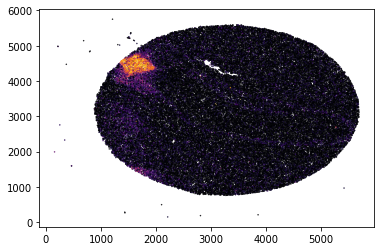

In [72]:
plt.scatter(x=UMI_frame['xcoord'], y=UMI_frame['ycoord'], c=np.log(UMI_frame['Ttr']+1), cmap='inferno', s=0.2)

In [47]:
UMI_frame['UMI_count'].median()

177.0

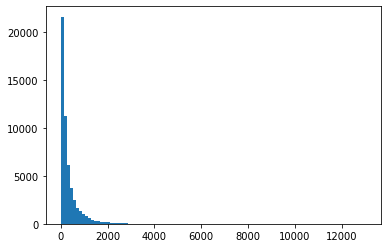

In [52]:
plt.hist(UMI_frame['UMI_count'], bins=100);

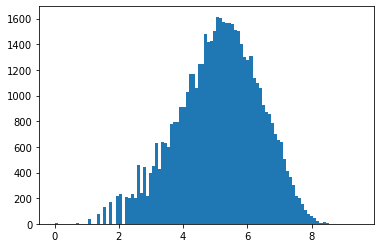

In [53]:
plt.hist(np.log(UMI_frame['UMI_count']), bins=100);